# Crime Rate Analysis in California

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("Crime_Data.xlsx")
data

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,2015-10-21 11:57:16
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,2015-10-21 11:57:16
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,2015-10-21 11:57:16
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,2015-10-21 11:57:16
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,NaN,1.000000,33873086.0,2015-10-21 11:57:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49222,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,18543759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18482091.0,2015-10-21 11:57:42
49223,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,18543759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18482091.0,2015-10-21 11:57:42
49224,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,18543759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18482091.0,2015-10-21 11:57:42
49225,752,"Number of Violent Crimes per 1,000 Population",2013.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,18543759.0,3.408640,3.382067,3.435214,0.013558,0.397750,NaN,0.860977,18482091.0,2015-10-21 11:57:42


## Exploratory Data Analysis

In [3]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49227 entries, 0 to 49226
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ind_id             49227 non-null  object        
 1   ind_definition     49226 non-null  object        
 2   reportyear         49226 non-null  float64       
 3   race_eth_code      49226 non-null  float64       
 4   race_eth_name      49226 non-null  object        
 5   geotype            49226 non-null  object        
 6   geotypevalue       49226 non-null  float64       
 7   geoname            49226 non-null  object        
 8   county_fips        48176 non-null  float64       
 9   county_name        48176 non-null  object        
 10  region_code        49156 non-null  float64       
 11  region_name        49156 non-null  object        
 12  strata_level_name  49226 non-null  object        
 13  numerator          32293 non-null  float64    

In [4]:
print("\nDescriptive Stats ")
print(data.describe(include='all'))


Descriptive Stats 
         ind_id                                 ind_definition    reportyear  \
count   49227.0                                          49226  49226.000000   
unique      2.0                                              1           NaN   
top       752.0  Number of Violent Crimes per 1,000 Population           NaN   
freq    49226.0                                          49226           NaN   
mean        NaN                                            NaN   2006.677711   
min         NaN                                            NaN   2000.000000   
25%         NaN                                            NaN   2003.000000   
50%         NaN                                            NaN   2007.000000   
75%         NaN                                            NaN   2010.000000   
max         NaN                                            NaN   2013.000000   
std         NaN                                            NaN      4.070900   

        race_eth_co

In [5]:
print("\nChecking Null Values ")
print(data.isnull().sum())


Checking Null Values 
ind_id                   0
ind_definition           1
reportyear               1
race_eth_code            1
race_eth_name            1
geotype                  1
geotypevalue             1
geoname                  1
county_fips           1051
county_name           1051
region_code             71
region_name             71
strata_level_name        1
numerator            16934
denominator          12137
rate                 41904
ll_95ci              41904
ul_95ci              41904
se                   41904
rse                  41904
ca_decile            42926
ca_rr                41904
dof_population       10567
version                  1
dtype: int64


In [6]:
print("\nShape Before Removing Duplicates")
print(data.shape)


Shape Before Removing Duplicates
(49227, 24)


In [7]:
data.drop_duplicates(inplace=True)

In [11]:
print("\nShape After Removing Duplicates ")
print(data.shape)


Shape After Removing Duplicates 
(49227, 24)


In [12]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
cat_cols = data.select_dtypes(include="object").columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\nidhu\AppData\Local\Temp\ipykernel_1612\559582860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


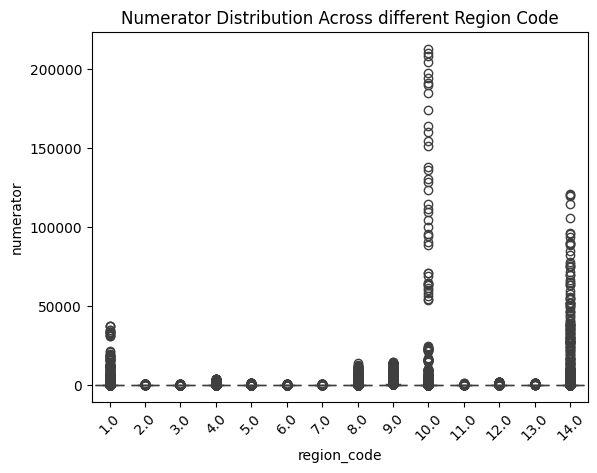

In [13]:
# Clean column names
data.columns = data.columns.str.strip()

# Create the boxplot
sns.boxplot(x='region_code', y='numerator', data=data)
plt.title('Numerator Distribution Across different Region Code')
plt.xticks(rotation=45)
plt.show()


In [14]:
Q1_num = data['numerator'].quantile(0.25)
Q3_num = data['numerator'].quantile(0.75)
IQR_num = Q3_num - Q1_num
lower_num = Q1_num - 1.5 * IQR_num
upper_num = Q3_num + 1.5 * IQR_num

# --- Filtering the dataframe
data = data[
    (data['numerator'] >= lower_num) & (data['numerator'] <= upper_num) 
]

print(f"Dataset shape after removing outliers: {data.shape}")

Dataset shape after removing outliers: (41214, 24)


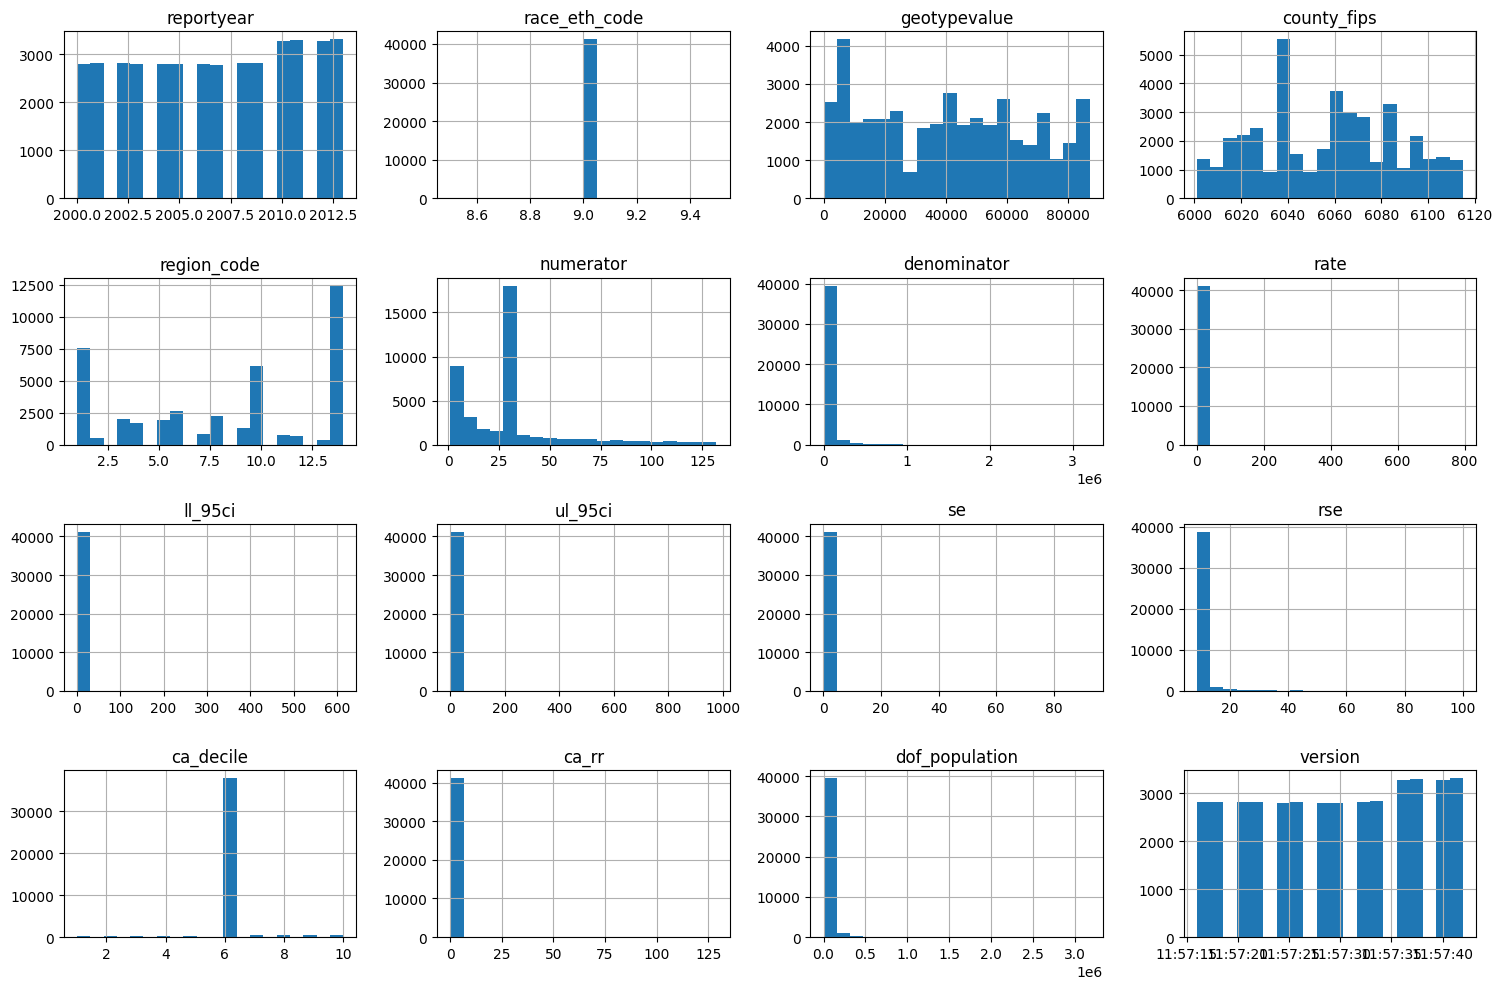

In [15]:
data.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

### Objective 1: Total Crimes by Types

In [16]:
crime_by_type = data.groupby('strata_level_name')['numerator'].sum().sort_values(ascending=False)

print("\nTotal Crimes by Type ")
print(crime_by_type)


Total Crimes by Type 
strata_level_name
Jurisdiction does not report             325344.0
Aggravated assault                       230584.0
Robbery                                  211451.0
Violent crime total                      201313.0
Murder and non-negligent manslaughter    155023.0
Forcible rape                            140337.0
Name: numerator, dtype: float64


C:\Users\nidhu\AppData\Local\Temp\ipykernel_1612\3682002895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_by_type.index, y=crime_by_type.values, palette="coolwarm")


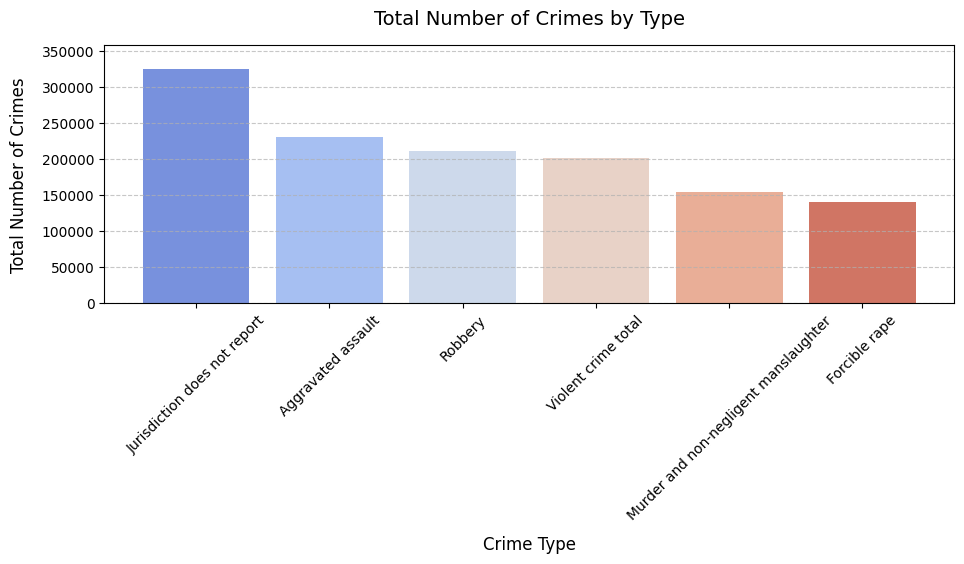

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_type.index, y=crime_by_type.values, palette="coolwarm")

# Titles and labels
plt.title("Total Number of Crimes by Type", fontsize=14, pad=15)
plt.xlabel("Crime Type", fontsize=12, labelpad=10)
plt.ylabel("Total Number of Crimes", fontsize=12, labelpad=10)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Grid and margins
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.margins(x=0.05, y=0.1)  
plt.tight_layout(pad=2.0)   

plt.show()

### Objective 2: Proportion of each Crime type

In [18]:
# Calculate proportion of each crime type
crime_proportion = crime_by_type / crime_by_type.sum()
crime_proportion_percent = crime_proportion * 100  

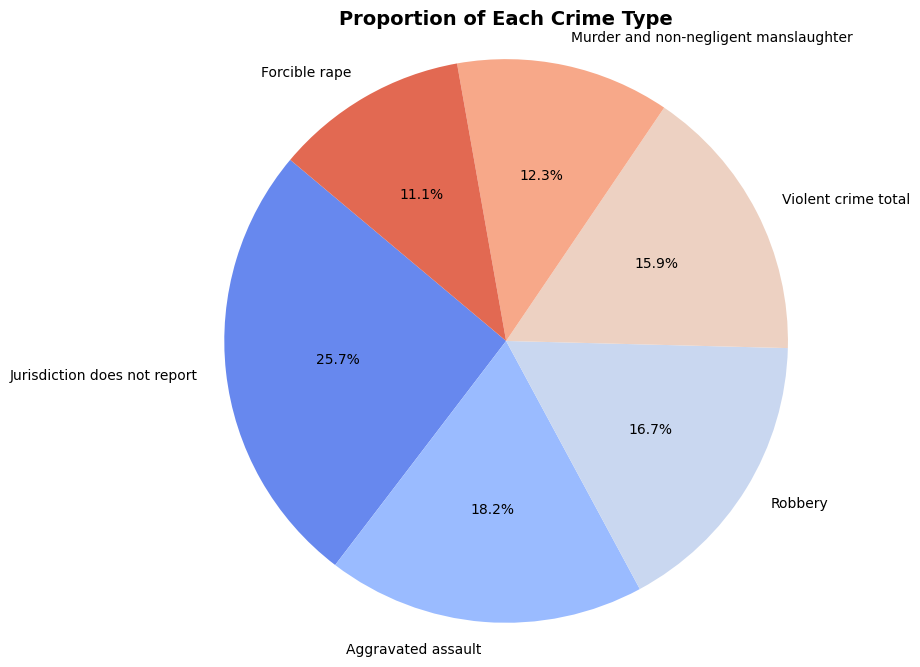

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(crime_proportion_percent, labels=crime_proportion.index, 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Proportion of Each Crime Type", fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### OBJTECTIVE 3: YEARLY TREND OF TOTAL CRIMES

In [20]:
yearly_crimes = data.groupby("reportyear")["numerator"].sum().reset_index()
yearly_crimes

,reportyear,numerator
0,2000.0,85722.0
1,2001.0,86490.0
2,2002.0,86667.0
3,2003.0,84624.0
4,2004.0,84169.0
5,2005.0,85907.0
6,2006.0,85383.0
7,2007.0,85654.0
8,2008.0,87714.0
9,2009.0,87714.0


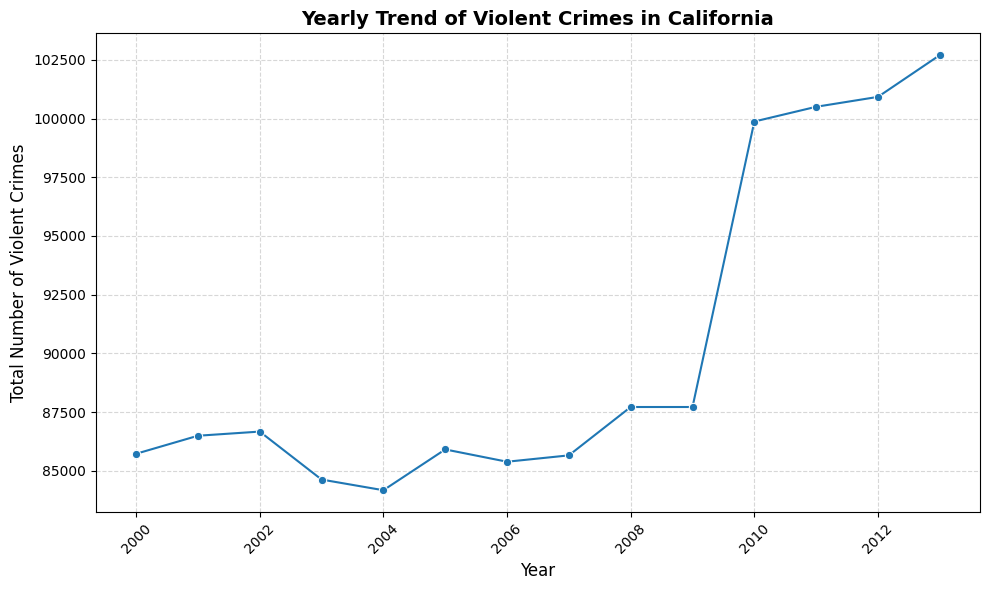

In [21]:
# Line plot for crime trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_crimes, x="reportyear", y="numerator", marker="o", color="#1f77b4")
plt.title("Yearly Trend of Violent Crimes in California", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Number of Violent Crimes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### OBJECTIVE 4: RELATIONSHIP BETWEEN CRIME COUNT AND RATE

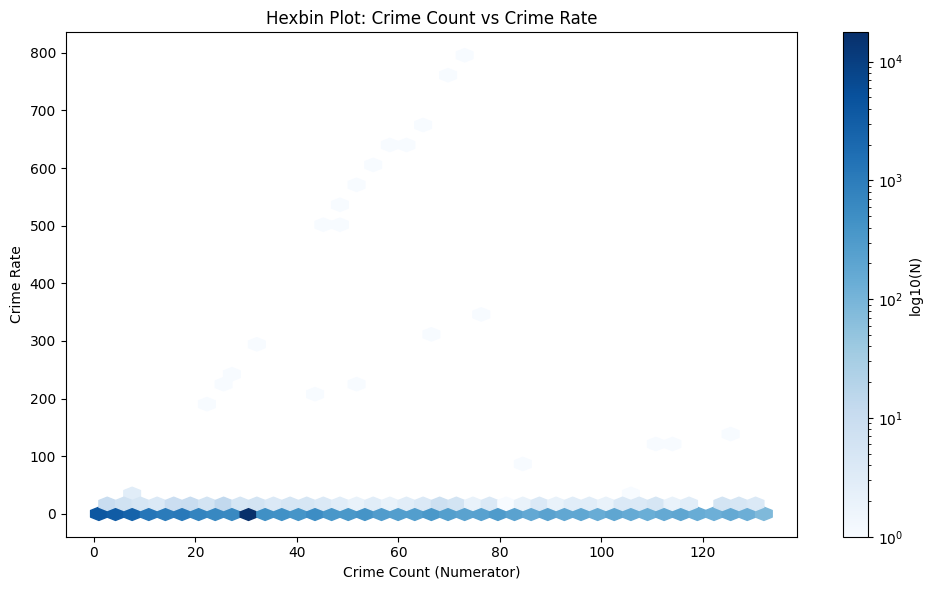

In [22]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['numerator'], data['rate'], gridsize=40, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.xlabel('Crime Count (Numerator)')
plt.ylabel('Crime Rate')
plt.title('Hexbin Plot: Crime Count vs Crime Rate')
plt.tight_layout()
plt.show()

### OBJECTIVE 5: COMPARE CRIME COUNT AND POPULATION

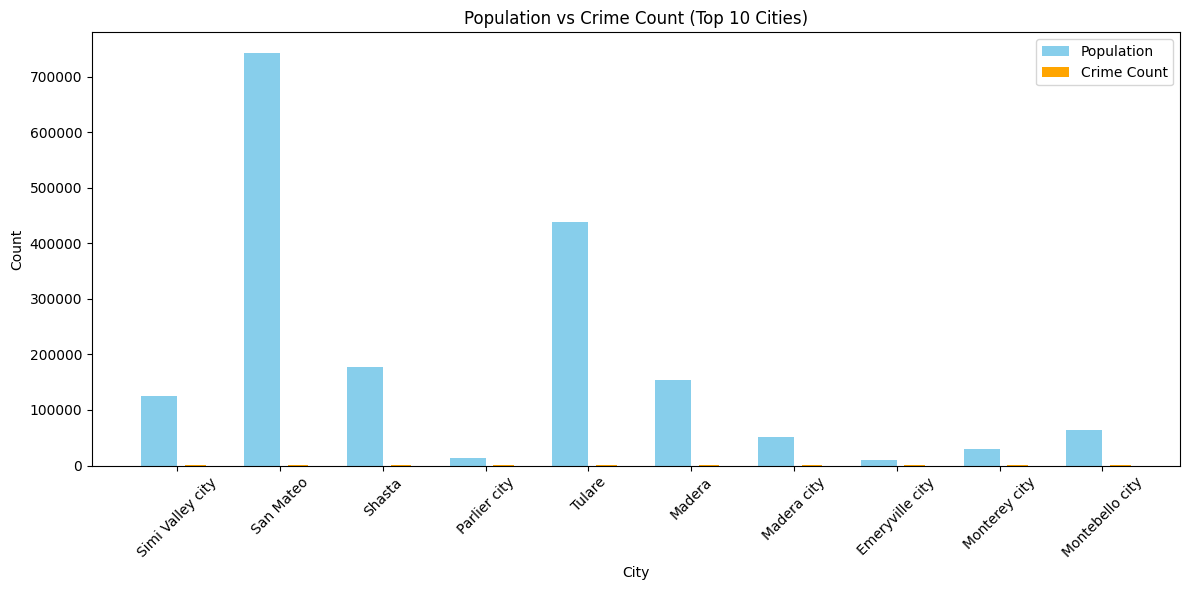

In [23]:
top10 = data.sort_values(by='numerator', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top10))

# Bar chart
plt.bar(index, top10['dof_population'], width=bar_width, label='Population', color='skyblue')
plt.bar([i + bar_width for i in index], top10['numerator'], width=0.2, label='Crime Count', color='orange')

# City labels on x-axis
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Population vs Crime Count (Top 10 Cities)")
plt.xticks([i + bar_width / 2 for i in index], top10['geoname'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Other objectives which will give more details about the factors involved in this analysis

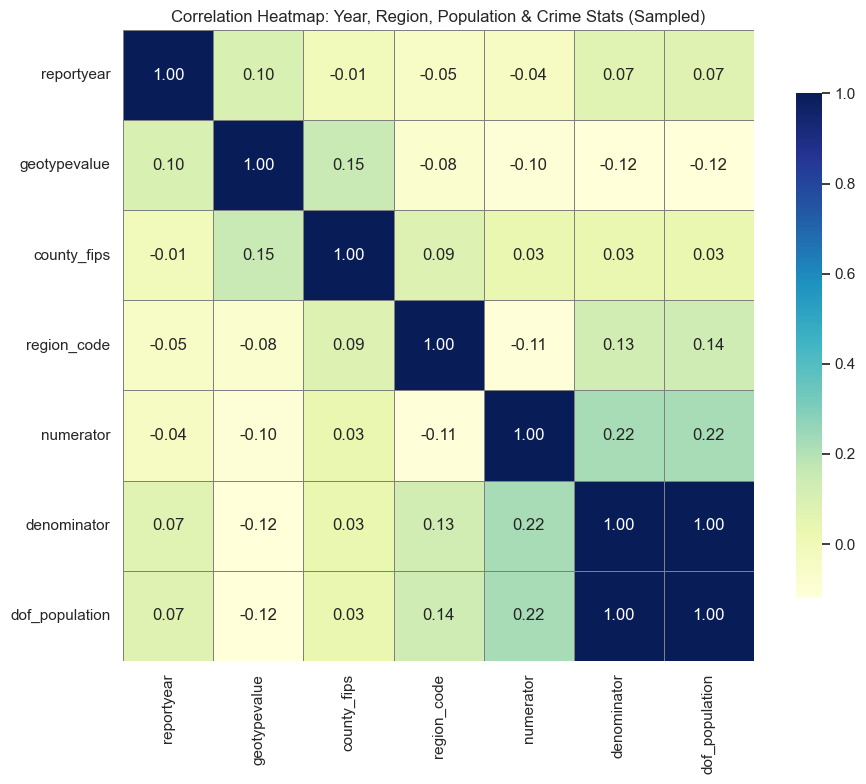

In [292]:
# Correlation heatmap
selected_cols = ['reportyear', 'geotypevalue', 'county_fips', 'region_code',
                 'numerator', 'denominator', 'dof_population']

# Ensure all are numeric type
df_selected = df_sample[selected_cols].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='YlGnBu',linewidths=0.5,linecolor='gray',square=True,cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap: Year, Region, Population & Crime Stats (Sampled)")
plt.tight_layout()
plt.show()

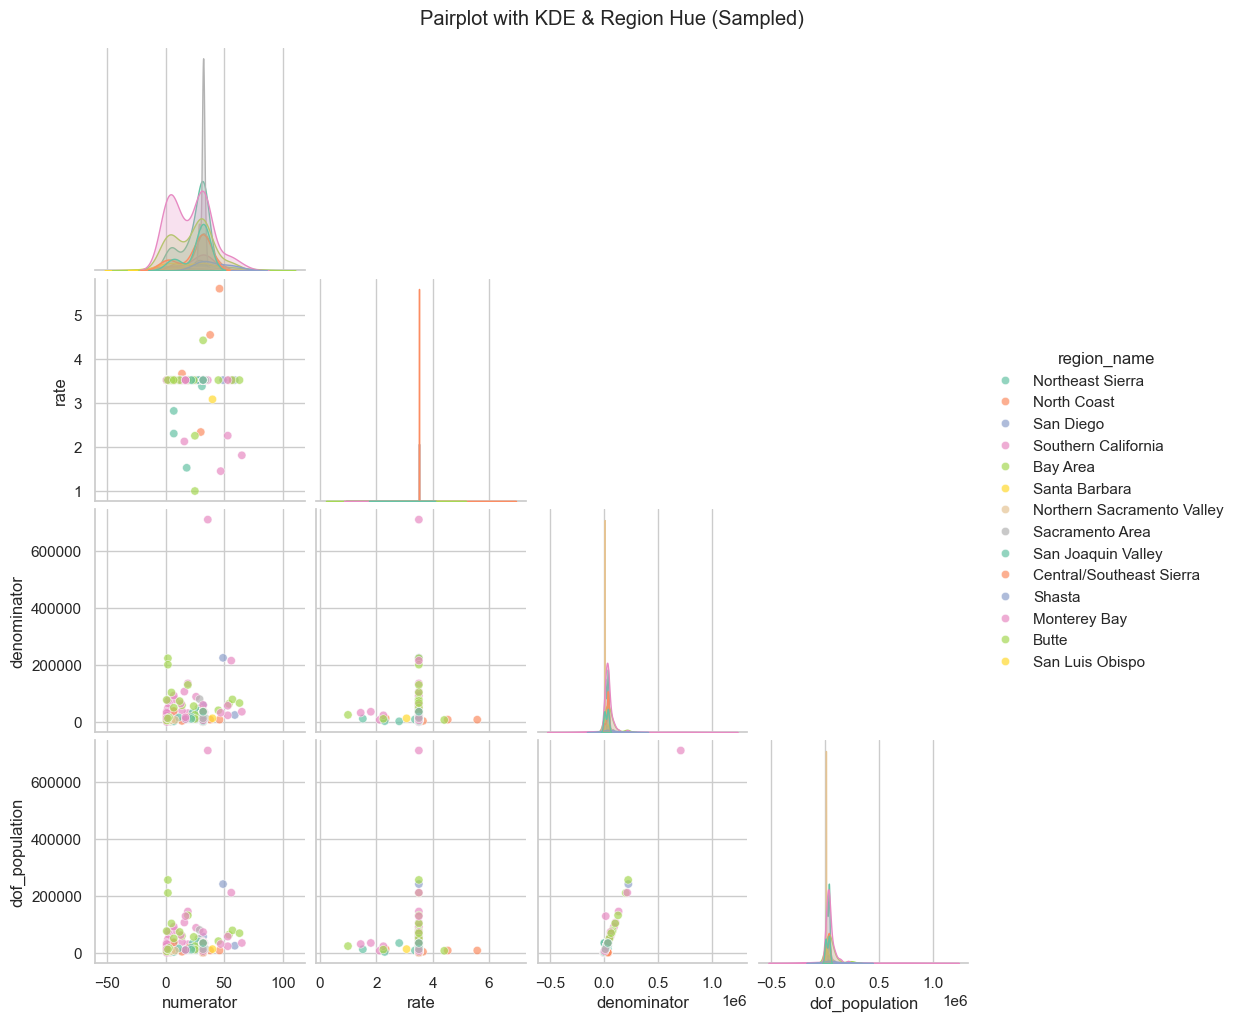

In [293]:
#Pairplot with KDE

df_sample = data.sample(n=200, random_state=42)
features = ['numerator', 'rate', 'denominator', 'dof_population']
sns.pairplot(df_sample[features + ['region_name']],hue='region_name',corner=True,diag_kind='kde',palette='Set2',plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot with KDE & Region Hue (Sampled)", y=1.02)
plt.show()